Noisy data in training
--
because there is an inherent noise in lidar readings, any model trained on lidar is suceptible to noise in the labels. This notebook experiments with methods intended to produce a more robust model.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import torch
from src.datasets.dublin.config import config as dublin_config
from src.training.config import config as train_config
from src.datasets.tools.dataloaders import get_dataloaders
from src.datasets.tools.create_dataset import create_dataset
from src.training.train import train
from src.datasets.tools.harmonization_mapping import HarmonizationMapping
import matplotlib.pyplot as plt
from IPython.display import Image


In [2]:
config = {
    'dataset': dublin_config,
    'train': train_config
}

hm = HarmonizationMapping(
    config['dataset']['scans_path'],
    config['dataset']['target_scan'],
    config['dataset']['harmonized_path'],
    create_new=config['dataset']['create_new'])

hm.print_mapping()
n_size = config['train']['neighborhood_size']
print(f"Running with {config['dataset']['workers']} cores")
print(f"Found GPU {config['train']['device']}")
print(f"Using {config['train']['num_gpus']} GPUs")

Final Mapping:
9: None
14: None
1: 1
Running with 8 cores
Found GPU cuda:0
Using 1 GPUs


In [3]:
# create_dataset(hm, config['dataset'])

In [4]:
dataloaders = get_dataloaders(config)
training_dataloaders = {k:v for k,v in dataloaders.items() if k != "eval"}

In [5]:
# Visualize Test Set Performance
model, path = train(training_dataloaders, config)

/home/david/bin/python/intensity/src/results/5
train: 1589
test: 397


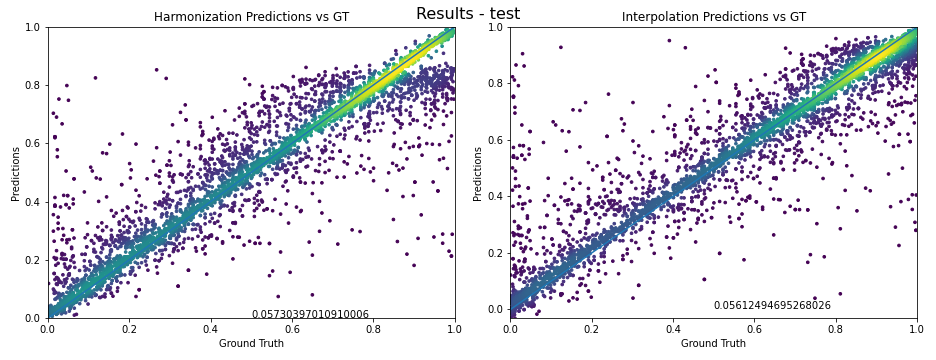

In [6]:
Image(filename=f"../../results/{n_size}/val_kde_{n_size}.png")
# best 0.05854 by removing regularization, igroup_size=0.01, group_sample_size=500, epochs=~25, n_size=5

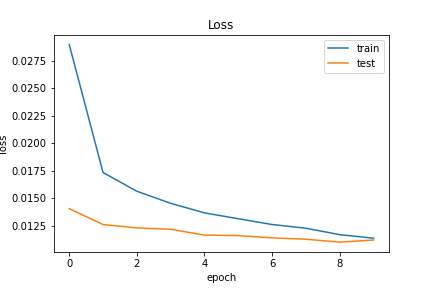

In [7]:
Image(filename=f"../../results/{n_size}/loss.png")

### Compare/Contrast with

In [ ]:
from src.datasets.tools.transforms import CloudJitter
training_dataloaders['train'].dataset.transform.transforms.append(CloudJitter())

In [ ]:
print("Training transformations:")
print(training_dataloaders['train'].dataset.transform)
print("All Dataloaders")
print(training_dataloaders)

In [ ]:
model, path = train(training_dataloaders, config)

In [ ]:
Image(filename=f"../../results/{n_size}/val_kde_{n_size}.png")

In [ ]:
Image(filename=f"../../results/{n_size}/loss.png")